<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C1/W1/ungraded_lab/C1_W1_Lab_1_hello_world_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Algorithms and Training in Neural Netowrks


In [ ]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13905 sha256=451e807d726fb5c719cc0b9eb2c64136c4b50fa956c4faebde2a4c257b54f70e
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
!pip install plot-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 35.0 MB/s eta 0:00:00


# Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
# from utils.plotting import *


#Loss Functions


Loss functions (also often called "objective functions" or "cost functions", although some debate that these are [slightly different things](https://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing)) are what we use to map the performance of a model to a real number and it's the thing we want to optimize! For example, here's the mean squared error (MSE), which is a common loss function:

$$f(y,\hat{y})=\frac{1}{n}\sum^{n}_{i=1}(\hat{y_i}-y_i)^2$$

Where $y_i$ is the actual response and $\hat{y_i}$ is the predicted response.

Consider a simple linear regression model $\hat{y_i} = w_0 + w_1x_i$, then our loss function is:

$$f(y,x,w)=\frac{1}{n}\sum^{n}_{i=1}((w_0 + w_1x_i)-y_i))^2$$

The optimization problem here is to find the values of $w_0$ and $w_1$ that minimizes the MSE.

#Gradients


a gradient is just a box holding all the $d$ partial derivatives (assuming you have a function of $d$ variables). For example, when $d=3$:

$$\nabla f(x,y,z)=\begin{bmatrix}\frac{\partial f}{\partial x}(x,y,z)\\ \frac{\partial f}{\partial y}(x,y,z) \\\frac{\partial f}{\partial z}(x,y,z)\end{bmatrix}$$

- Or, more generally, if $x$ is a vector then

$$\nabla f(x)=\begin{bmatrix}\frac{\partial f}{\partial x_1}(x)\\ \frac{\partial f}{\partial x_2}(x) \\ \vdots \\ \frac{\partial f}{\partial x_d}(x)\end{bmatrix}$$


- (optional) Thus, a partial derivative is a function that has the same mapping as the original, e.g. $\mathbb{R}^3\rightarrow \mathbb{R}$ ("R three to R").
- (optional) a gradient is a function that maps from the original input space to the same space, e.g. $\mathbb{R}^3\rightarrow \mathbb{R}^3$ ("R three to R three").

**Notation warning**: we use the term "derivative" or "gradient" to mean three different things:

1. Operator (written $\frac{d}{dx}$ or $\nabla$), which maps **functions to functions**; "now we take the gradient".
2. Function (written $\frac{df}{dx}$ or $\nabla f$), which maps **vectors to vectors**; "the gradient is $2x+5$"
    - This is what you get after applying the operator to a function.
3. Value (written as a number or vector), which is **just a number or vector**; "the gradient is  $\begin{bmatrix}-2.34\\6.43\end{bmatrix}$"
    - This is what you get after applying the function to an input.
  
This is extremely confusing!

Here's a table summarizing the situation, assuming 3 variables (in general it could be any number)

|  Name   | Operator | Function | Maps  | Example Value  |
|---------|----------|-----------|------|----------|
| Derivative | $\frac{d}{dx}$ | $\frac{df}{dx}(x)$ | $\mathbb{R}\rightarrow \mathbb{R}$ | $2.5$ |
| Partial Derivative |  ${\frac{\partial}{\partial x}}$ |  ${\frac{\partial f}{\partial x}}(x,y,z)$ | ${\mathbb{R}^3\rightarrow \mathbb{R}}$ | $2.5$ |
| Gradient |  $\nabla$ | $\nabla f(x,y,z)$ |$\mathbb{R}^3\rightarrow \mathbb{R}^3$ | $\begin{bmatrix}2.5\\0\\-1\end{bmatrix}$ |

### Gradient Intuition


Since a gradient is a vector, we can talk about its magnitude and direction.
  - The magnitude is $\|\nabla f\|$ and tells us **how fast things are changing**.
  - The direction is $\frac{\nabla f}{\|\nabla f \|}$ and tells us **the direction of fastest change** or the steepest direction.

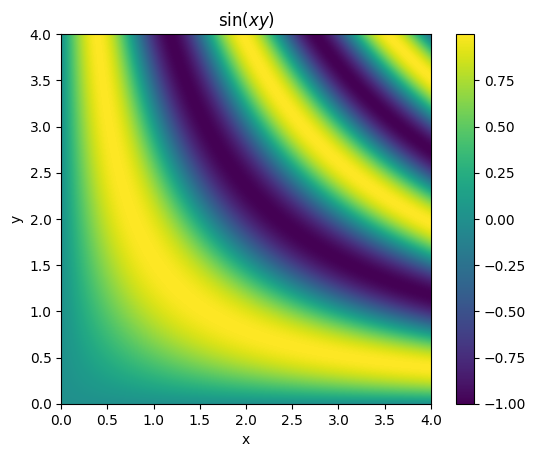

In [ ]:
f = lambda x, y: np.sin(x * y)

x = np.linspace(0, 4, 1000)
y = np.linspace(0, 4, 1000)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

plt.imshow(zz, extent=(np.min(x), np.max(x), np.min(y), np.max(y)), origin="lower")
plt.xlabel("x")
plt.ylabel("y")
plt.title("$\sin(xy)$")
plt.colorbar();

$$\nabla \sin(xy) = \begin{bmatrix} y \cos(xy)\\x\cos(xy)\end{bmatrix}$$

In [ ]:
gradf = lambda x, y: (y * np.cos(x * y), x * np.cos(x * y))

xsmall = np.linspace(0, 4, 15)
ysmall = np.linspace(0, 4, 15)
xxsmall, yysmall = np.meshgrid(xsmall, ysmall)
gradx, grady = gradf(xxsmall, yysmall)

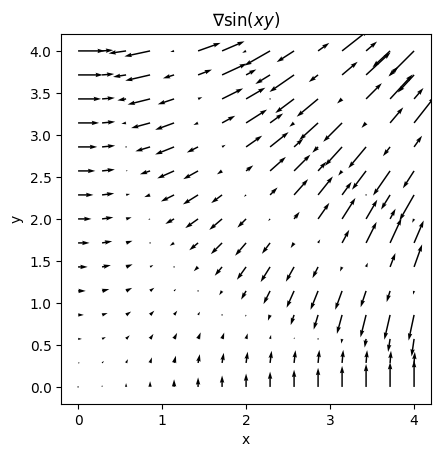

In [ ]:
plt.quiver(xxsmall, yysmall, gradx, grady)
plt.axis("square")
plt.xlabel("x")
plt.ylabel("y")
plt.title("∇$ \sin(xy)$");

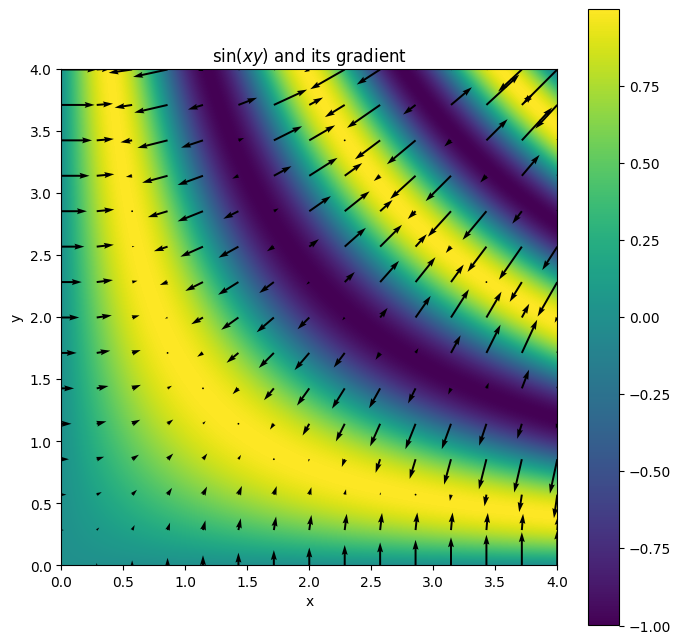

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(zz,extent=(np.min(x), np.max(x), np.min(y), np.max(y)), origin='lower')
plt.colorbar();
plt.quiver(xxsmall,yysmall,gradx,grady);
plt.xlabel("x")
plt.ylabel("y")
plt.title("$\sin(xy)$ and its gradient");

### Why is it Direction of Fastest Increase

For example if the gradient is:

$$\begin{bmatrix} 5 \\ 2 \\ -1 \\ 0 \end{bmatrix}\, ,$$

why go in the gradient direction instead of the $x_1$ direction, since that first component has the biggest partial derivative. Doesn't it seem wasteful to go partly in those other directions?

First, a proof that the gradient is the best direction. Let's say we are at position $x$ and we move by an infinitesimal (i.e. extremely tiny) $v$, which is a vector having components $v_1, v_2, \ldots v_d$. The change in $f$ from moving from $x$ to $x+v$ is $\frac{\partial f}{dx_1} v_1 + \frac{\partial f}{dx_2} v_2 + \ldots \frac{\partial f}{dx_d} v_d$, where all the partial derivatives are evaluated at $x$ (I believe this is related to the "total derivative"). In other words, the change in $f$ is the dot product $\nabla f \cdot v$. So now the question is, what vector $v$ of fixed length maximizes $\nabla f \cdot v$. The answer is a vector that points in the same direction as $\nabla f$. (That's a property of the dot product, and is evident by the definition: $a \cdot b = \| a \| \|b \| \cos(\theta)$. Since $\| \nabla f \|$ and $\|v\|$ are fixed in our case, to maximize this we want to maximize $\cos(\theta)$, which means we want $\cos(\theta)=1$ meaning $\theta=0$, or the angle between the vectors is $0$).

Second, the intuition. I think the "paradox" comes from over-privileging the coordinate axes. They are not special in any way! For example if you rotate the coordinate system by 45 degrees, the direction of steepest ascent should also rotate by 45 degrees. Under the suggested system, this would not happen. Why? Well, there is always going to be one element of the gradient that is largest. Does that mean the direction of steepest ascent is always one of the coordinate axis directions? No. That doesn't make sense and also fails the "rotate by 45 degrees test" because the direction will have rotated by 0, 90, 180 or 270 degrees.

# Gradient Descent with 1 Parameter

Gradient descent is an optimization algorithm that can help us optimize our loss function more efficiently than the "manual" approach we tried above. As the name suggest, we are going to leverage the **gradient** of our loss function to help us optimize our model parameters. The gradient is just a vector of (partial) derivatives of the loss function w.r.t the model parameters. Sounds complicated but it's not at all (as I'll hopefully show you).

In plain English, the gradient will tell us two things:
1. Which direction to move our parameter in to decrease loss (i.e., should we increase or decrease its value?)
2. How far to move it (i.e., should we adjust it by 0.1 or 2 or 50 etc.?)


Let's forget about the intercept now and just work with this simple linear model: $\hat{y_i}=wx_i$. For this model, the loss function has the form:

$$f(w)=\frac{1}{n}\sum^{n}_{i=1}((wx_i)-y_i))^2$$

The gradient of this function with respect to the parameter $w$ is:

$$\frac{d}{dw}f(w)=\frac{1}{n}\sum^{n}_{i=1}2x_i(wx_i - y_i)$$

Let's code that up and calculate the gradient of our loss function at a slope of $w = 0.5$:

The amount we adjust our slope each iteration is controlled by a "learning rate", denoted $\alpha$ (note the minus in the equation below which accounts for flipping the sign of the gradient as discussed above):

$$w_{new} = w - \alpha \times gradient$$

$$w_{new} = w - \alpha \frac{d}{dw}f(w)$$

$\alpha$ is a hyperparameter that can be optimized, typical values range from 0.001 to 0.9. With the math out of the way, we're now ready to use gradient descent to optimize our slope. Gradient descent is an iterative algorithm, meaning that we keep repeating it until we meet some stopping criteria. Typically we stop gradient descent when:
1. the step size is smaller than some pre-defined threshold; or,
2. a certain number of steps is completed.

So the pseudo code for gradient descent boils down to this:

```sh
1. begin with with some arbitrary w
while stopping criteria not met:
    2. calculate mean gradient across all examples
    3. update w based on gradient and learning rate
    4. repeat
```

Let's go ahead and implement that now:

# Building and Training Neural Networks

Like every first app, you should start with something super simple that shows the overall scaffolding for how your code works. In the case of creating neural networks, one simple case is where it learns the relationship between two numbers. So, for example, if you were writing code for a function like this, you already know the 'rules':


```
def hw_function(x):
    y = (2 * x) - 1
    return y
```

So how would you train a neural network to do the equivalent task? By using data! By feeding it with a set of x's and y's, it should be able to figure out the relationship between them.

This is obviously a very different paradigm from what you might be used to. So let's step through it piece by piece.


## Imports

Let's start with the imports. Here, you are importing [TensorFlow](https://www.tensorflow.org/) and calling it `tf` for convention and ease of use.

You then import a library called [`numpy`](https://numpy.org) which helps to represent data as arrays easily and to optimize numerical operations.

The framework you will use to build a neural network as a sequence of layers is called [`keras`](https://keras.io/) so you will import that too.


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

2.15.0


## Define and Compile the Neural Network

Next, you will create the simplest possible neural network. It has 1 layer with 1 neuron, and the input shape to it is just 1 value. You will build this model using Keras' [Sequential](https://keras.io/api/models/sequential/) class which allows you to define the network as a sequence of [layers](https://keras.io/api/layers/). You can use a single [Dense](https://keras.io/api/layers/core_layers/dense/) layer to build this simple network as shown below.

In [ ]:
# Build a simple Sequential model
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Now, you will compile the neural network. When you do so, you have to specify 2 functions: a [loss](https://keras.io/api/losses/) and an [optimizer](https://keras.io/api/optimizers/).

If you've seen lots of math for machine learning, here's where it's usually used. But in this case, it's nicely encapsulated in functions and classes for you. But what happens here? Let's explain...

You know that in the function declared at the start of this notebook, the relationship between the numbers is `y=2x-1`. When the computer is trying to 'learn' that, it makes a guess... maybe `y=10x+10`. The `loss` function measures the guessed answers against the known correct answers and measures how well or how badly it did.

It then uses the `optimizer` function to make another guess. Based on how the loss function went, it will try to minimize the loss. At that point maybe it will come up with something like `y=5x+5`, which, while still pretty bad, is closer to the correct result (i.e. the loss is lower).

It will repeat this for the number of _epochs_ which you will see shortly. But first, here's how you will tell it to use [mean squared error](https://keras.io/api/losses/regression_losses/#meansquarederror-function) for the loss and [stochastic gradient descent](https://keras.io/api/optimizers/sgd/) for the optimizer. You don't need to understand the math for these yet, but you can see that they work!

Over time, you will learn the different and appropriate loss and optimizer functions for different scenarios.


In [ ]:
# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

## Providing the Data

Next up, you will feed in some data. In this case, you are taking 6 X's and 6 Y's. You can see that the relationship between these is `y=2x-1`, so where `x = -1`, `y=-3` etc.

The de facto standard way of declaring model inputs and outputs is to use `numpy`, a Python library that provides lots of array type data structures. You can specify these values by building numpy arrays with [`np.array()`](https://numpy.org/doc/stable/reference/generated/numpy.array.html).

In [ ]:
# Declare model inputs and outputs for training
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# Training the Neural Network

The process of training the neural network, where it 'learns' the relationship between the x's and y's is in the [`model.fit()`](https://keras.io/api/models/model_training_apis/#fit-method)  call. This is where it will go through the loop we spoke about above: making a guess, measuring how good or bad it is (aka the loss), using the optimizer to make another guess etc. It will do it for the number of `epochs` you specify. When you run this code, you'll see the loss on the right hand side.

In [ ]:
# Train the model
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 404ms/step - loss: 18.6695
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 14.9479
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 12.0145
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 9.7015
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 7.8766
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 6.4358
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 5.2974
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 4.3970
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 3.6838
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 3.1181
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss: 2.6686
Epoch 12/500
1/1 [==============================] - 0s 8ms/step - loss: 2.3104
Epoch 13/500
1/1 [==============================] - 0s 

Ok, now you have a model that has been trained to learn the relationship between `x` and `y`. You can use the [`model.predict()`](https://keras.io/api/models/model_training_apis/#predict-method) method to have it figure out the `y` for a previously unknown `x`. So, for example, if `x=10`, what do you think `y` will be? Take a guess before you run this code:

In [ ]:
# Make a prediction
print(model.predict([10.0]))

1/1 [==============================] - 0s 90ms/step
[[18.98091]]


You might have thought `19`, right? But it ended up being a little under. Why do you think that is?

Remember that neural networks deal with probabilities. So given the data that we fed the model with, it calculated that there is a very high probability that the relationship between `x` and `y` is `y=2x-1`, but with only 6 data points we can't know for sure. As a result, the result for 10 is very close to 19, but not necessarily 19.

As you work with neural networks, you'll see this pattern recurring. You will almost always deal with probabilities, not certainties, and will do a little bit of coding to figure out what the result is based on the probabilities, particularly when it comes to classification.
